### Assignment 17
### kartik singh

In [316]:
# Predict the selling price of car from the given dataset using Linear Regression Model
# Column Name:
# name: Name of Car
# year: In which year car is purchased
# selling_price: Selling price of Car
# km_driven: Car driven in Kms
# fuel: Type of car Petrol,Diesel or CNG
# seller_type: who is selling the car
# transmission: car is automatic or manual
# mileage: Mileage of Car
# engine: Car Engine in cc
# max_power: Maximum power of car
# seats: Number of seats in car

### step 1 : firstly import the necessarry libraries 

In [317]:
# firstly import the necessarry libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
%matplotlib inline


### step 2 : Import the csv file and clean the car data

In [318]:
car=pd.read_csv('car_details.csv')

In [319]:
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,16.1 kmpl,1298 CC,88.2 bhp,5.0


### step 3: cleaning the data from null values and more

In [320]:
car.isnull().sum()     # checking null values 

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

In [271]:
car.dropna(inplace=True)

In [272]:
car.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [273]:
car.info() # getting info of car data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7907 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7907 non-null   object 
 1   year           7907 non-null   int64  
 2   selling_price  7907 non-null   int64  
 3   km_driven      7907 non-null   int64  
 4   fuel           7907 non-null   object 
 5   seller_type    7907 non-null   object 
 6   transmission   7907 non-null   object 
 7   mileage        7907 non-null   object 
 8   engine         7907 non-null   object 
 9   max_power      7907 non-null   object 
 10  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 741.3+ KB


In [274]:
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [275]:
car['seats'].astype('int32')  # changing float to int32
car['mileage']=car['mileage'].str.replace('kmpl|km/kg','')






C:\Users\user\AppData\Local\Temp\ipykernel_10272\685941611.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  car['mileage']=car['mileage'].str.replace('kmpl|km/kg','')


In [276]:
car['mileage']=car['mileage'].astype('float')
car['engine']=car['engine'].str.replace('CC','')
car['engine']=car['engine'].astype('int64')

In [277]:
car['max_power']=car['max_power'].str.replace('bhp','')
car['max_power']=pd.to_numeric(car['max_power'],errors='coerce')
car['max_power']=car['max_power'].astype('float')

In [278]:
### AND EXCLUDING UNNECESSARY COLUMNS
car
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7907 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7907 non-null   object 
 1   year           7907 non-null   int64  
 2   selling_price  7907 non-null   int64  
 3   km_driven      7907 non-null   int64  
 4   fuel           7907 non-null   object 
 5   seller_type    7907 non-null   object 
 6   transmission   7907 non-null   object 
 7   mileage        7907 non-null   float64
 8   engine         7907 non-null   int64  
 9   max_power      7906 non-null   float64
 10  seats          7907 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 741.3+ KB


In [322]:

car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   mileage        7907 non-null   object 
 8   engine         7907 non-null   object 
 9   max_power      7913 non-null   object 
 10  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 698.6+ KB


In [323]:

car.dropna(inplace=True)
car.isnull().sum()
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7907 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7907 non-null   object 
 1   year           7907 non-null   int64  
 2   selling_price  7907 non-null   int64  
 3   km_driven      7907 non-null   int64  
 4   fuel           7907 non-null   object 
 5   seller_type    7907 non-null   object 
 6   transmission   7907 non-null   object 
 7   mileage        7907 non-null   object 
 8   engine         7907 non-null   object 
 9   max_power      7907 non-null   object 
 10  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 741.3+ KB


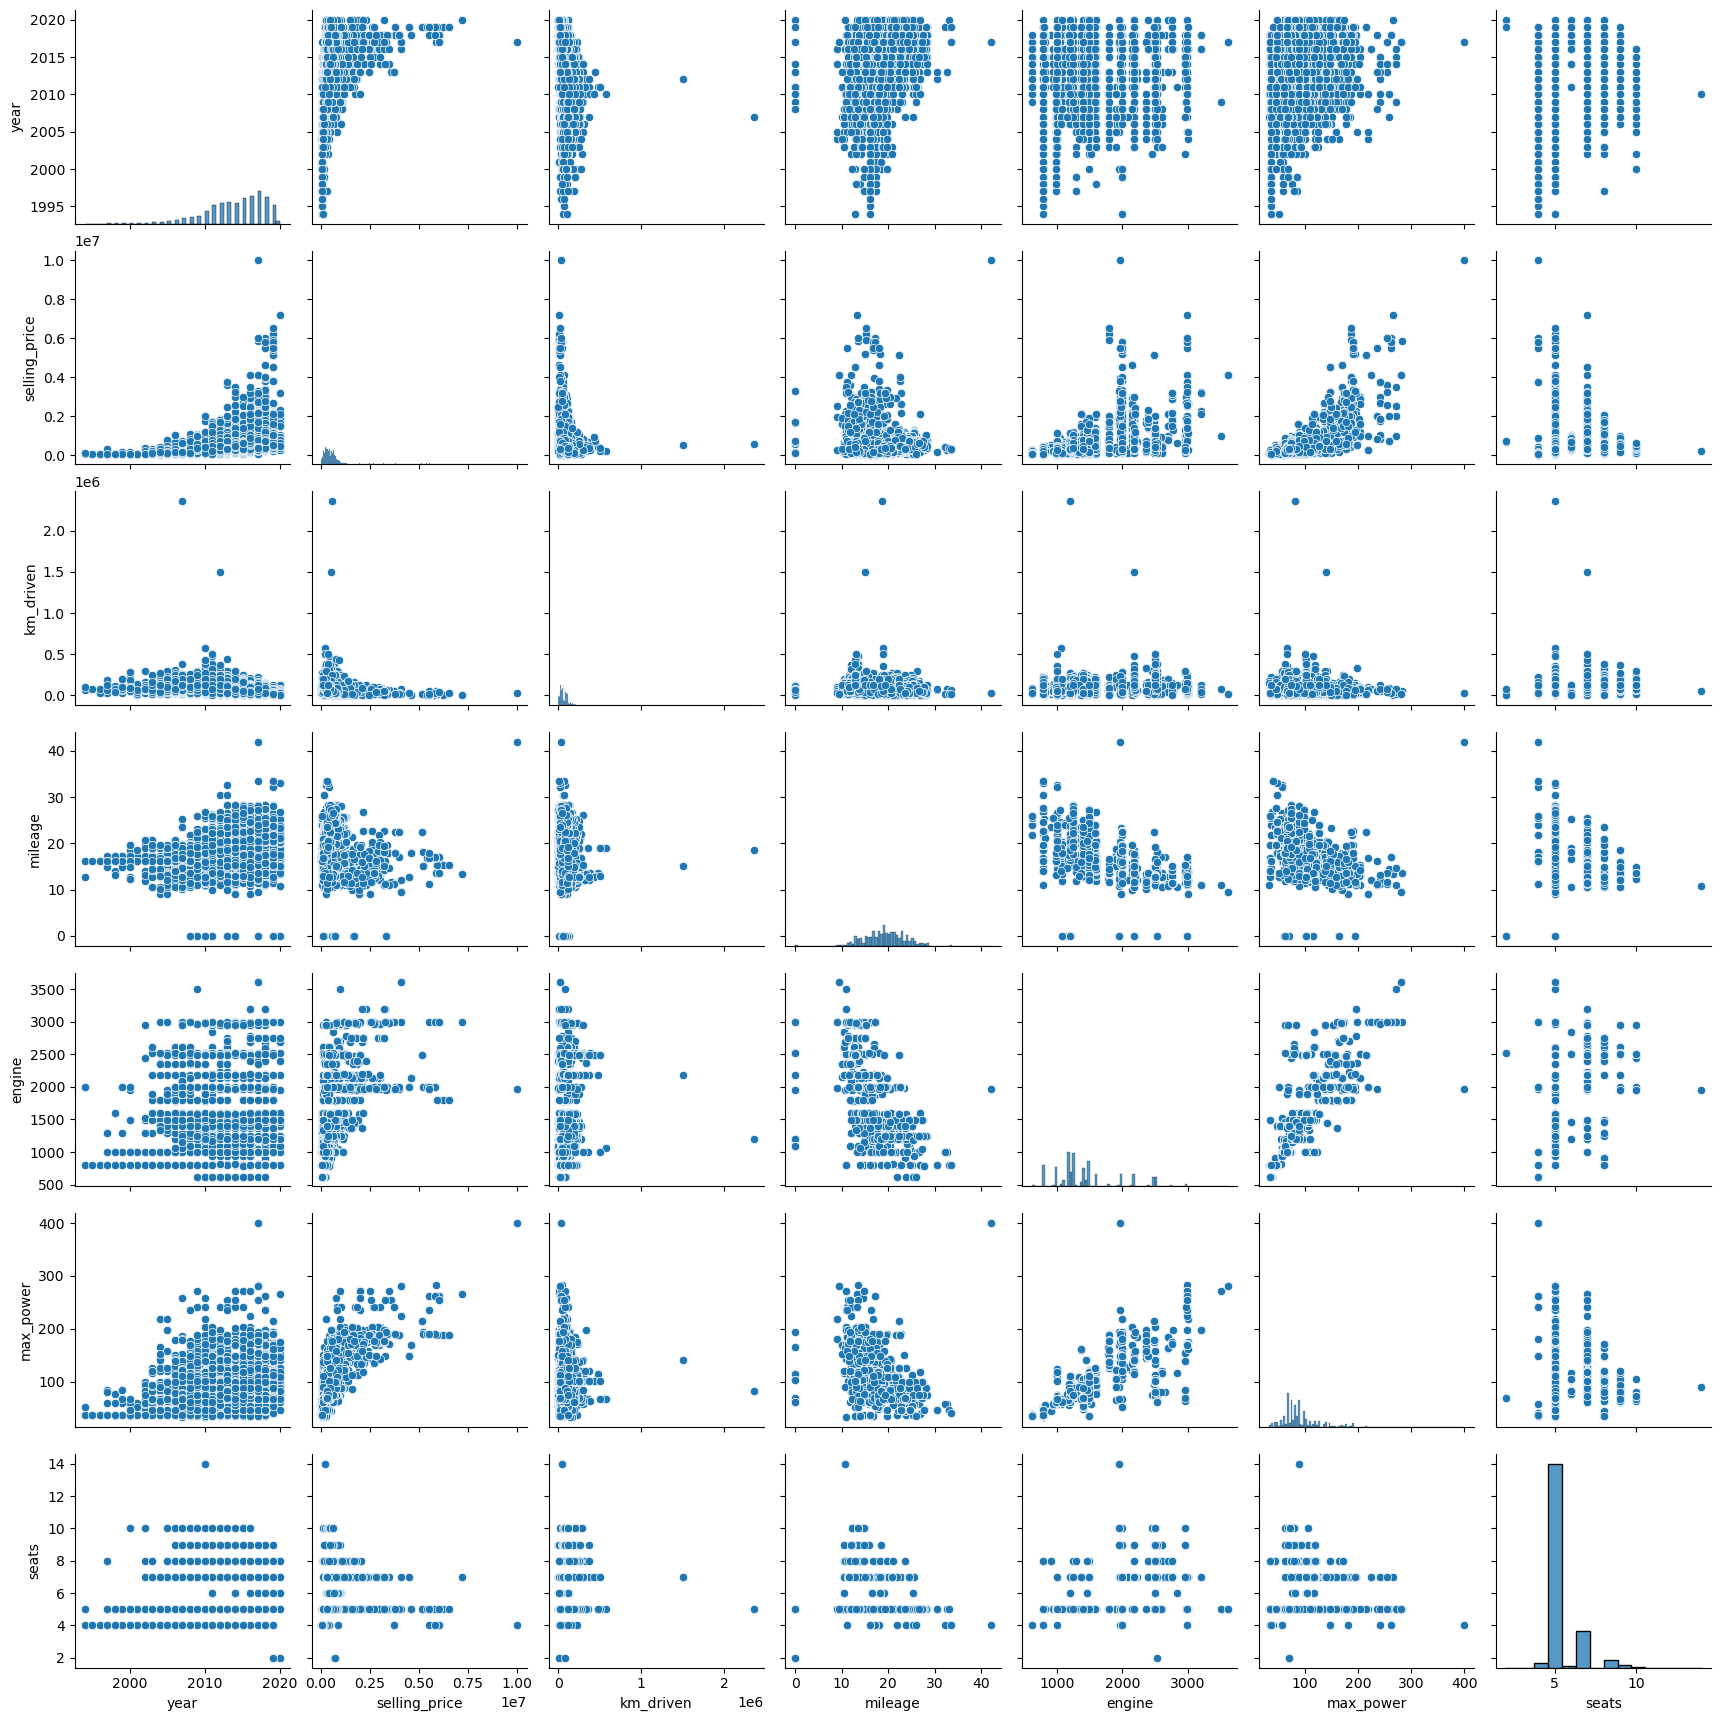

In [281]:
sns.pairplot(car)

### step 4 : seprating dependent and independent variables into x and y 
car.columns

In [324]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [325]:
x= car[['name', 'year','km_driven', 'fuel', 'transmission',
       'mileage', 'engine', 'max_power', 'seats']]

In [326]:
x

,name,year,km_driven,fuel,transmission,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Manual,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Manual,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,140000,Petrol,Manual,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Manual,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,120000,Petrol,Manual,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,110000,Petrol,Manual,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,Hyundai Verna CRDi SX,2007,119000,Diesel,Manual,16.8 kmpl,1493 CC,110 bhp,5.0
8125,Maruti Swift Dzire ZDi,2009,120000,Diesel,Manual,19.3 kmpl,1248 CC,73.9 bhp,5.0
8126,Tata Indigo CR4,2013,25000,Diesel,Manual,23.57 kmpl,1396 CC,70 bhp,5.0


In [327]:
y=car[['selling_price']]

In [328]:
model = LinearRegression()


In [329]:
#using label encoding to convert car names and other string data
X=pd.get_dummies(x)
X

,year,km_driven,seats,name_Ambassador CLASSIC 1500 DSL AC,name_Ambassador Classic 2000 DSZ AC PS,name_Ambassador Grand 1500 DSZ BSIII,name_Ambassador Grand 2000 DSZ PW CL,name_Ashok Leyland Stile LE,name_Audi A3 35 TDI Premium Plus,name_Audi A3 40 TFSI Premium,...,max_power_98.6 bhp,max_power_98.63 bhp,max_power_98.79 bhp,max_power_98.82 bhp,max_power_98.96 bhp,max_power_98.97 bhp,max_power_99 bhp,max_power_99.23 bhp,max_power_99.6 bhp,max_power_bhp
0,2014,145500,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2014,120000,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2006,140000,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2010,127000,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2007,120000,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,110000,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8124,2007,119000,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8125,2009,120000,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8126,2013,25000,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [330]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=101)

In [331]:
X_train.shape  , y_train.shape , X_test.shape  , y_test.shape


((6325, 2827), (6325, 1), (1582, 2827), (1582, 1))

In [332]:
lr=LinearRegression()


In [333]:
lr.fit(X_train,y_train)

LinearRegression()

In [334]:
y_pred=lr.predict(X_test)          # predicting the selling price

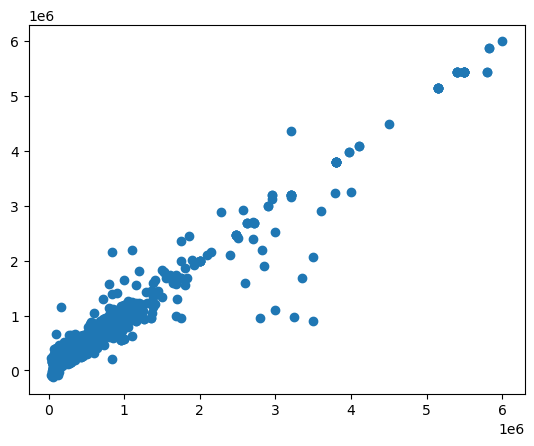

In [335]:
plt.scatter(y_test,y_pred)

In [315]:
z=[[2006,140000,17.7,1497.0,780.00,5.0,0,0,0,1,0,1,0,0,1]]

### step : regression model analysis

In [265]:
from sklearn import metrics
from sklearn.metrics import r2_score